### sklearn.discriminant_analysis.LinearDiscriminantAnalysis

_class_ sklearn.discriminant_analysis.LinearDiscriminantAnalysis(_solver='svd'_, _shrinkage=None_, _priors=None_, _n_components=None_, _store_covariance=False_, _tol=0.0001_, _covariance_estimator=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/discriminant_analysis.py#L173)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis "Permalink to this definition")


Parameters:

**solver**{‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’

Solver to use, possible values:

-   ‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
    
-   ‘lsqr’: Least squares solution. Can be combined with shrinkage or custom covariance estimator.
    
-   ‘eigen’: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.
    

Changed in version 1.2: `solver="svd"`  now has experimental Array API support. See the  [Array API User Guide](https://scikit-learn.org/stable/modules/array_api.html#array-api)  for more details.

**shrinkage**‘auto’ or float, default=None

Shrinkage parameter, possible values:

-   None: no shrinkage (default).
    
-   ‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
    
-   float between 0 and 1: fixed shrinkage parameter.
    

This should be left to None if  `covariance_estimator`  is used. Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers.

**priors**array-like of shape (n_classes,), default=None

The class prior probabilities. By default, the class proportions are inferred from the training data.

**n_components**int, default=None

Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features). This parameter only affects the  `transform`  method.

**store_covariance**bool, default=False

If True, explicitly compute the weighted within-class covariance matrix when solver is ‘svd’. The matrix is always computed and stored for the other solvers.

New in version 0.17.

**tol**float, default=1.0e-4

Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X. Dimensions whose singular values are non-significant are discarded. Only used if solver is ‘svd’.

New in version 0.17.

**covariance_estimator**covariance estimator, default=None

If not None,  `covariance_estimator`  is used to estimate the covariance matrices instead of relying on the empirical covariance estimator (with potential shrinkage). The object should have a fit method and a  `covariance_`  attribute like the estimators in  [`sklearn.covariance`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.covariance "sklearn.covariance"). if None the shrinkage parameter drives the estimate.

This should be left to None if  `shrinkage`  is used. Note that  `covariance_estimator`  works only with ‘lsqr’ and ‘eigen’ solvers.

New in version 0.24.

Attributes:

**coef_**ndarray of shape (n_features,) or (n_classes, n_features)

Weight vector(s).

**intercept_**ndarray of shape (n_classes,)

Intercept term.

**covariance_**array-like of shape (n_features, n_features)

Weighted within-class covariance matrix. It corresponds to  `sum_k  prior_k  *  C_k`  where  `C_k`  is the covariance matrix of the samples in class  `k`. The  `C_k`  are estimated using the (potentially shrunk) biased estimator of covariance. If solver is ‘svd’, only exists when  `store_covariance`  is True.

**explained_variance_ratio_**ndarray of shape (n_components,)

Percentage of variance explained by each of the selected components. If  `n_components`  is not set then all components are stored and the sum of explained variances is equal to 1.0. Only available when eigen or svd solver is used.

**means_**array-like of shape (n_classes, n_features)

Class-wise means.

**priors_**array-like of shape (n_classes,)

Class priors (sum to 1).

**scalings_**array-like of shape (rank, n_classes - 1)

Scaling of the features in the space spanned by the class centroids. Only available for ‘svd’ and ‘eigen’ solvers.

**xbar_**array-like of shape (n_features,)

Overall mean. Only present if solver is ‘svd’.

**classes_**array-like of shape (n_classes,)

Unique class labels.

**n_features_in_**int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).

New in version 0.24.

**feature_names_in_**ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
std_scaler = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=2)

iris_data_scal = std_scaler.fit_transform(iris.data)
lda.fit(iris_data_scal, iris.target)
iris_lad=lda.transform(iris_data_scal)
print(iris_lad.shape)

(150, 2)


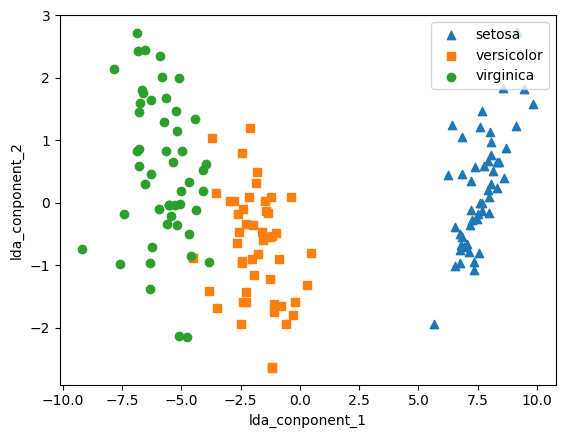

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ["lda_conponent_1", "lda_conponent_2"]
iris_df_lda = pd.DataFrame(iris_lad, columns=lda_columns)
iris_df_lda["target"] = iris.target

markers = ["^", "s", "o"]

for i, markers in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda["target"]==i]["lda_conponent_1"]
    y_axis_data = iris_df_lda[iris_df_lda["target"]==i]["lda_conponent_2"]
    
    plt.scatter(x_axis_data,y_axis_data, marker=markers, label= iris.target_names[i])
    
plt.legend(loc = "upper right")
plt.xlabel("lda_conponent_1")
plt.ylabel("lda_conponent_2")
plt.show()
    

# sklearn.decomposition.TruncatedSVD

*_class_ sklearn.decomposition.TruncatedSVD(_n_components=2_, _*_, _algorithm='randomized'_, _n_iter=5_, _n_oversamples=10_, _power_iteration_normalizer='auto'_, _random_state=None_, _tol=0.0_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/decomposition/_truncated_svd.py#L25)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD "Permalink to this definition")

Parameters:

**n_components**int, default=2

Desired dimensionality of output data. If algorithm=’arpack’, must be strictly less than the number of features. If algorithm=’randomized’, must be less than or equal to the number of features. The default value is useful for visualisation. For LSA, a value of 100 is recommended.

**algorithm**{‘arpack’, ‘randomized’}, default=’randomized’

SVD solver to use. Either “arpack” for the ARPACK wrapper in SciPy (scipy.sparse.linalg.svds), or “randomized” for the randomized algorithm due to Halko (2009).

**n_iter**int, default=5

Number of iterations for randomized SVD solver. Not used by ARPACK. The default is larger than the default in  [`randomized_svd`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd "sklearn.utils.extmath.randomized_svd")  to handle sparse matrices that may have large slowly decaying spectrum.

**n_oversamples**int, default=10

Number of oversamples for randomized SVD solver. Not used by ARPACK. See  [`randomized_svd`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd "sklearn.utils.extmath.randomized_svd")  for a complete description.

New in version 1.1.

**power_iteration_normalizer**{‘auto’, ‘QR’, ‘LU’, ‘none’}, default=’auto’

Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See  [`randomized_svd`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.extmath.randomized_svd.html#sklearn.utils.extmath.randomized_svd "sklearn.utils.extmath.randomized_svd")  for more details.

New in version 1.1.

**random_state**int, RandomState instance or None, default=None

Used during randomized svd. Pass an int for reproducible results across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**tol**float, default=0.0

Tolerance for ARPACK. 0 means machine precision. Ignored by randomized SVD solver.

Attributes:

**components_**ndarray of shape (n_components, n_features)

The right singular vectors of the input data.

**explained_variance_**ndarray of shape (n_components,)

The variance of the training samples transformed by a projection to each component.

**explained_variance_ratio_**ndarray of shape (n_components,)

Percentage of variance explained by each of the selected components.

**singular_values_**ndarray of shape (n_components,)

The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the  `n_components`  variables in the lower-dimensional space.

**n_features_in_**int

Number of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit).

New in version 0.24.

**feature_names_in_**ndarray of shape (`n_features_in_`,)

Names of features seen during  [fit](https://scikit-learn.org/stable/glossary.html#term-fit). Defined only when  `X`  has feature names that are all strings.

In [6]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.rand(4,4)
print(a)

[[0.11133083 0.21076757 0.23296249 0.15194456]
 [0.83017814 0.40791941 0.5557906  0.74552394]
 [0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394]]


In [8]:
u, sigma, vt = svd(a)
print(u,sigma,vt)

[[-1.68754172e-01  5.96585233e-04 -1.28030368e-01 -9.77307474e-01]
 [-5.41180899e-01 -8.27940452e-01  1.25652407e-01  7.64808162e-02]
 [-6.61815978e-01  3.55167918e-01 -6.30103694e-01  1.97039834e-01]
 [-4.90555681e-01  4.34016131e-01  7.55505812e-01 -1.40032101e-02]] [2.15332208 0.72498078 0.35625682 0.0071655 ] [[-0.29791226 -0.61212576 -0.54299496 -0.49163687]
 [-0.8152922   0.52228196  0.07460897 -0.23864971]
 [-0.14791783  0.1735881  -0.71394122  0.66202373]
 [ 0.47399075  0.56779466 -0.43574982 -0.51289774]]


In [9]:
sigma_mat = np.diag(sigma)
a_ = np.dot(np.dot(u,sigma_mat),vt)
print(a_)

[[0.11133083 0.21076757 0.23296249 0.15194456]
 [0.83017814 0.40791941 0.5557906  0.74552394]
 [0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394]]


In [10]:
a[2] =  a[0] + a[1]
a[3] = a[0]
print(a)

[[0.11133083 0.21076757 0.23296249 0.15194456]
 [0.83017814 0.40791941 0.5557906  0.74552394]
 [0.94150897 0.61868699 0.78875309 0.8974685 ]
 [0.11133083 0.21076757 0.23296249 0.15194456]]


In [11]:
u, sigma, vt = svd(a)
print(u,sigma,vt)

[[-0.15590302  0.61293902  0.77091531 -0.07542934]
 [-0.60733515 -0.48077439  0.31319348  0.54946323]
 [-0.76323817  0.13216463 -0.31319348 -0.54946323]
 [-0.15590302  0.61293902 -0.45772183  0.62489257]] [2.15120873e+00 2.40313093e-01 2.97610746e-16 1.23091907e-17] [[-0.58455768 -0.36522162 -0.47052466 -0.55091927]
 [-0.57515045  0.59932929  0.51024676 -0.22283316]
 [-0.57204705 -0.21031914 -0.05230005  0.79107063]
 [ 0.01601433  0.68057581 -0.71799687  0.14505379]]


In [13]:
u_ = u[:,:2]
sigma_ = np.diag(sigma[:2])

vt_ = vt[:2]
print(u_.shape, sigma_.shape, vt_.shape)

a_ = np.dot(np.dot(u_,sigma_), vt_)
print(a_)

(4, 2) (2, 2) (2, 4)
[[0.11133083 0.21076757 0.23296249 0.15194456]
 [0.83017814 0.40791941 0.5557906  0.74552394]
 [0.94150897 0.61868699 0.78875309 0.8974685 ]
 [0.11133083 0.21076757 0.23296249 0.15194456]]


In [20]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print("원본행렬 : \n", matrix)

u, sigma, vt = svd(matrix, full_matrices=False)
print(u.shape, sigma.shape, vt.shape)

num_components = 4
u_tr, sigma_tr, vt_tr = svds(matrix, k=num_components)
print(u_tr.shape, sigam_tr.shape, v_tr.shape)
print(sigma)
matrix_tr = np.dot(np.dot(u_tr,np.diag(sigma_tr)), vt_tr)
print(matrix_tr)

원본행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)
(6, 4) (4,) (4, 6)
[3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
[[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


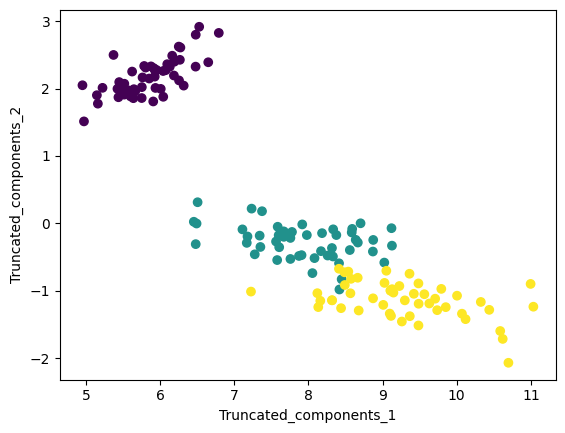

In [21]:
from sklearn.decomposition import TruncatedSVD, PCA

iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel("Truncated_components_1")
plt.ylabel("Truncated_components_2")
plt.show()

Text(0.5, 1.0, 'PCA_Transformed')

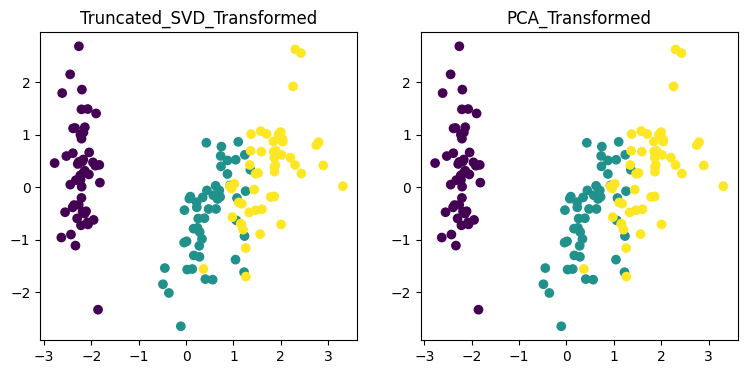

In [24]:
iris_ftrs_scale = std_scaler.fit_transform(iris_ftrs)

tsvd.fit(iris_data_scal)
iris_tsvd_scal = tsvd.transform(iris_ftrs_scale)

pca = PCA(n_components=2)
pca.fit(iris_ftrs_scale)
iris_pca_scale = pca.transform(iris_ftrs_scale)

fig, (ax1, ax2) = plt.subplots(figsize = (9,4), ncols=2)
ax1.scatter(x=iris_tsvd_scal[:,0], y=iris_tsvd_scal[:,1], c=iris.target)
ax2.scatter(x=iris_pca_scale[:,0], y=iris_pca_scale[:,1], c=iris.target)
ax1.set_title("Truncated_SVD_Transformed")
ax2.set_title("PCA_Transformed")